In [39]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.14.0



Found 651 files belonging to 2 classes.


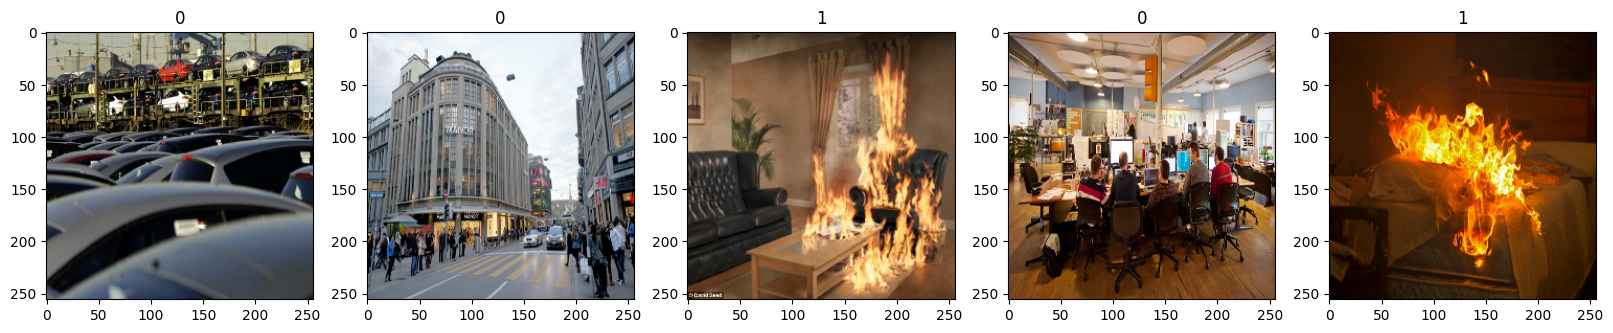

In [40]:
import numpy as np
import os
from matplotlib import pyplot as plt
#import tensorflow_datasets as tdfs
from keras.preprocessing.image import ImageDataGenerator
data = tf.data.Dataset

data = tf.keras.utils.image_dataset_from_directory("C:\\Users\Anshi\Downloads\\archive\\Fire-Detection")

#image_dir = "C:\\Users\Anshi\Downloads\\archive\\Fire-Detection"

data_it = data.as_numpy_iterator()

batch = data_it.next()

fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
	ax[idx].imshow(img.astype(int))
	ax[idx].title.set_text(batch[1][idx])



In [41]:
data = data.map(lambda x, y: (x/255, y))
scaled_it = data.as_numpy_iterator()
batch = scaled_it.next()


1.0

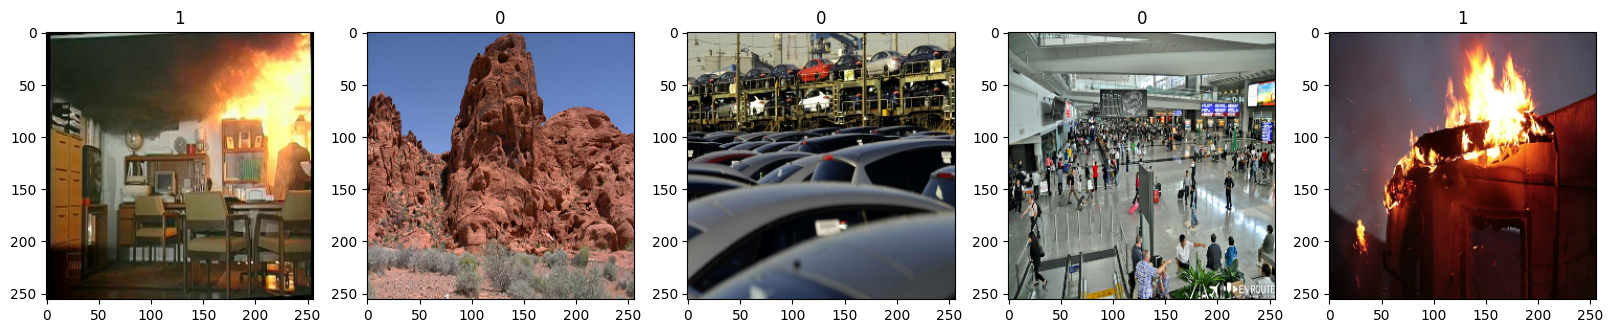

In [42]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))

for idx, img in enumerate(batch[0][:5]):
	ax[idx].imshow(img)
	ax[idx].title.set_text(batch[1][idx])

batch[0].max()

In [44]:
len(data)


21

In [45]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [49]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)


In [52]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()


In [53]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [55]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
14/14 [==============================] - 23s 1s/step - loss: 0.6563 - accuracy: 0.7946 - val_loss: 0.3267 - val_accuracy: 0.8906
Epoch 2/20
14/14 [==============================] - 20s 1s/step - loss: 0.3735 - accuracy: 0.8080 - val_loss: 0.2586 - val_accuracy: 0.8984
Epoch 3/20
14/14 [==============================] - 20s 1s/step - loss: 0.3272 - accuracy: 0.8326 - val_loss: 0.2499 - val_accuracy: 0.8984
Epoch 4/20
14/14 [==============================] - 20s 1s/step - loss: 0.3038 - accuracy: 0.8594 - val_loss: 0.2636 - val_accuracy: 0.8828
Epoch 5/20
14/14 [==============================] - 20s 1s/step - loss: 0.2793 - accuracy: 0.8705 - val_loss: 0.2316 - val_accuracy: 0.9141
Epoch 6/20
14/14 [==============================] - 20s 1s/step - loss: 0.2180 - accuracy: 0.9018 - val_loss: 0.2677 - val_accuracy: 0.8672
Epoch 7/20
14/14 [==============================] - 20s 1s/step - loss: 0.1964 - accuracy: 0.9196 - val_loss: 0.2198 - val_accuracy: 0.9062
Epoch 8/20
14/14 [==

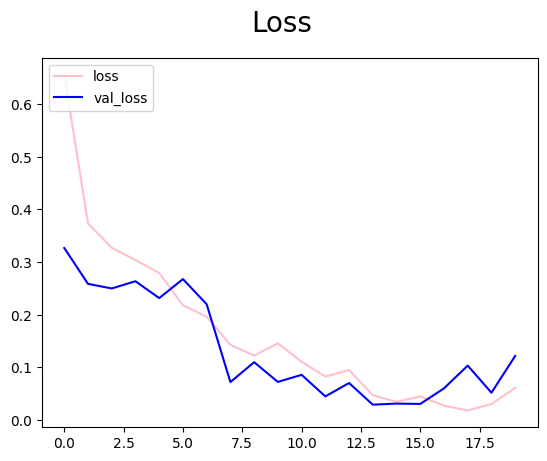

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='pink', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#loss function as the data is training so checks to see inaccuracy (over time it is less)

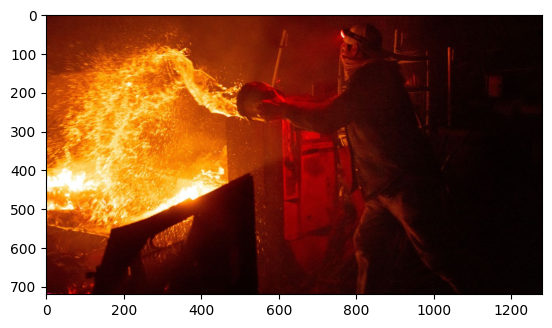

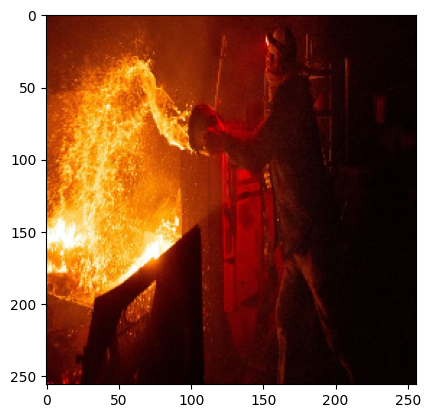

In [87]:
import cv2
img = cv2.imread('fire2.jpg')
color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.show()

resize = tf.image.resize(color, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5: 
    print(f'Predicted class is detected wildfire')
else:
    print(f'Predicted class is not detected wildfire')

1/1 [==============================] - 0s 59ms/step
Predicted class is detected wildfire


In [89]:
yhat

array([[0.9994592]], dtype=float32)